In [1]:
import numpy as np
import pandas as pd
from plotnine import *
import statistics

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV

import plotly.graph_objects as go
import plotly.express as px

In [2]:
# Usaremos o dataset no qual mediremos o comprimento de um cateter (em cm) de acordo com a altura (em metros) do paciente
df = pd.DataFrame(data=[[1.087, 37], [1.613, 50], [0.953, 34], [1.003, 36], [1.156,43], [0.978, 28], [1.092, 37], [0.572, 20], [0.940, 34], [0.597, 30], [0.838, 38], [1.473, 47]], columns=['Altura', 'Comprimento'])

In [3]:
df

,Altura,Comprimento
0,1.087,37
1,1.613,50
2,0.953,34
3,1.003,36
4,1.156,43
5,0.978,28
6,1.092,37
7,0.572,20
8,0.940,34
9,0.597,30


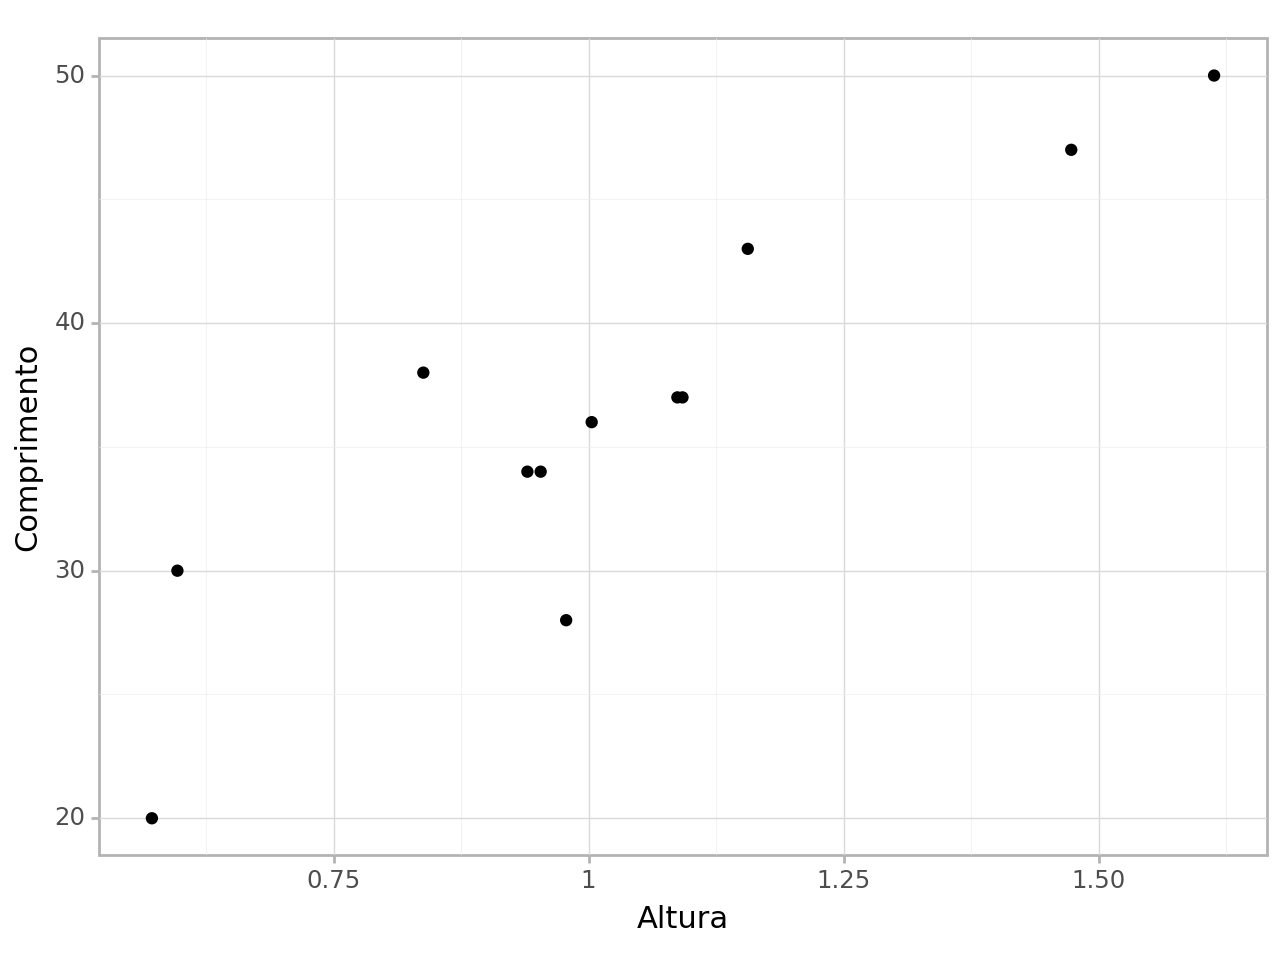

<Figure Size: (640 x 480)>

In [4]:
(ggplot(df, aes('Altura', 'Comprimento')) + geom_point() + theme_light())

In [7]:
df_shuffle = df.copy()
len(df_shuffle)

12

In [17]:
w0 = 10 # Termo independente
w1 = 20 # Coeficiente angular
alfa = 0.001 # Taxa de aprendizado
EQM = [] # Erro Quadrado Médio por época
w0_list = []
w1_list = []

for epoca in range(1000):
    acc = 0
    erro = 0
    sumw0 = 0
    sumw1 = 0

    tamanho_df_shuffle = len(df_shuffle)
    for i in range(tamanho_df_shuffle):
        x_i = df_shuffle.iloc[i, 0]
        y_i = df_shuffle.iloc[i, 1]

        erro = (y_i - w1 * x_i - w0)
        sumw0 += erro 
        sumw1 += erro * x_i
        acc += erro * erro

    w0 += alfa * (sumw0 / tamanho_df_shuffle)
    w1 += alfa * (sumw1 / tamanho_df_shuffle)

    w0_list.append(w0)
    w1_list.append(w1)

    EQM.append(acc / tamanho_df_shuffle)

In [14]:
print(w0, w1)

12.343024298110999 22.60158300659572


In [ ]:
w0_list

In [ ]:
w1_list

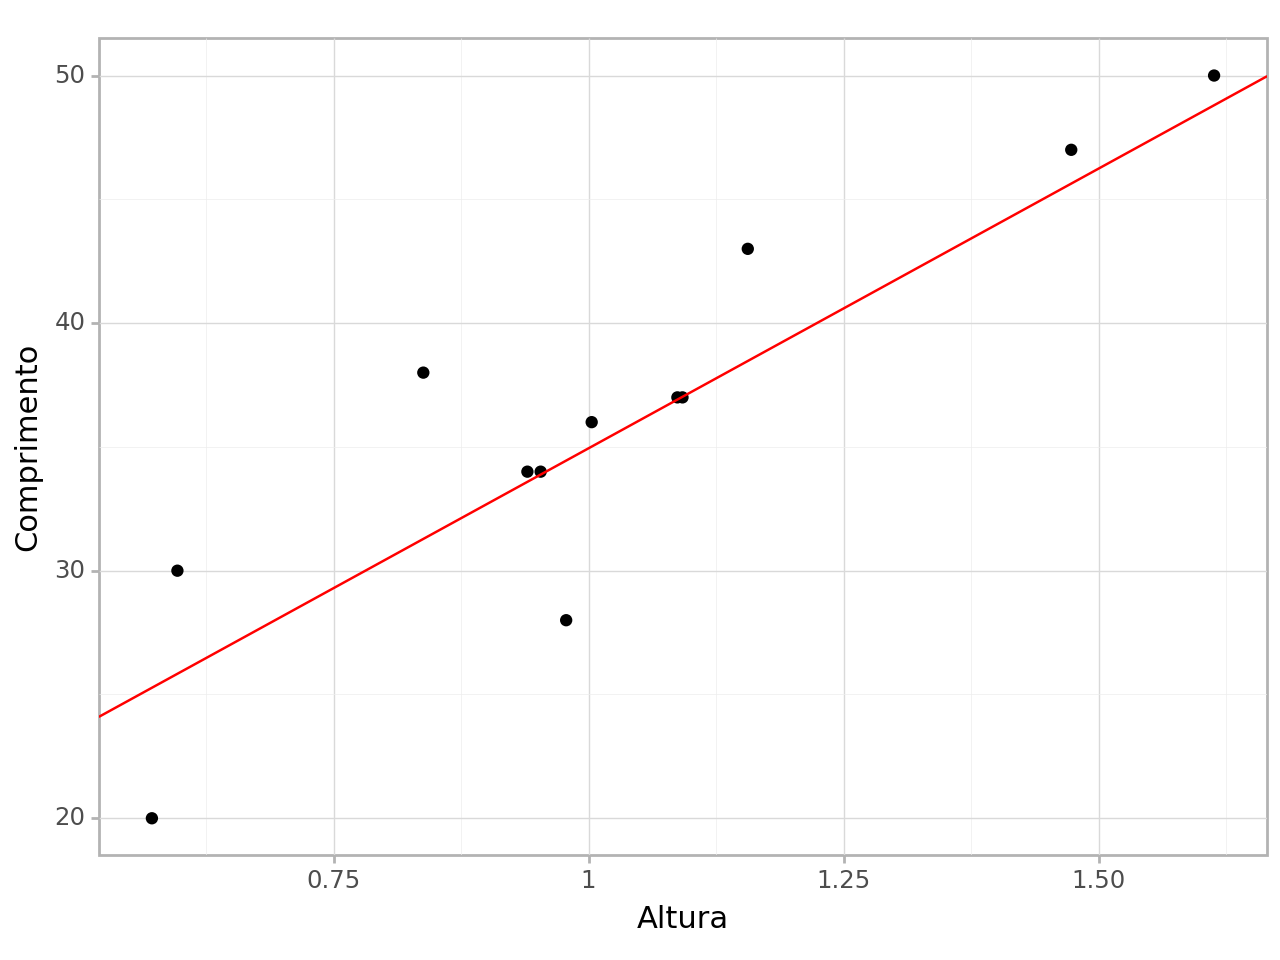

<Figure Size: (640 x 480)>

In [16]:
(ggplot(df, aes('Altura', 'Comprimento'))
 + geom_point()
 + theme_light()
 + geom_abline(intercept = w0, slope = w1, color='red')
)

In [20]:
def predict_(w0, w1, x):
    y = w1 * x + w0
    return y

In [21]:
predict_(w0, w1, 1.8)

53.025873709983294

In [23]:
EQM_df = pd.DataFrame(EQM)
EQM_df

,0
0,45.933533
1,45.793888
2,45.654828
3,45.516349
4,45.378450
...,...
995,13.076960
996,13.074801
997,13.072651
998,13.070510


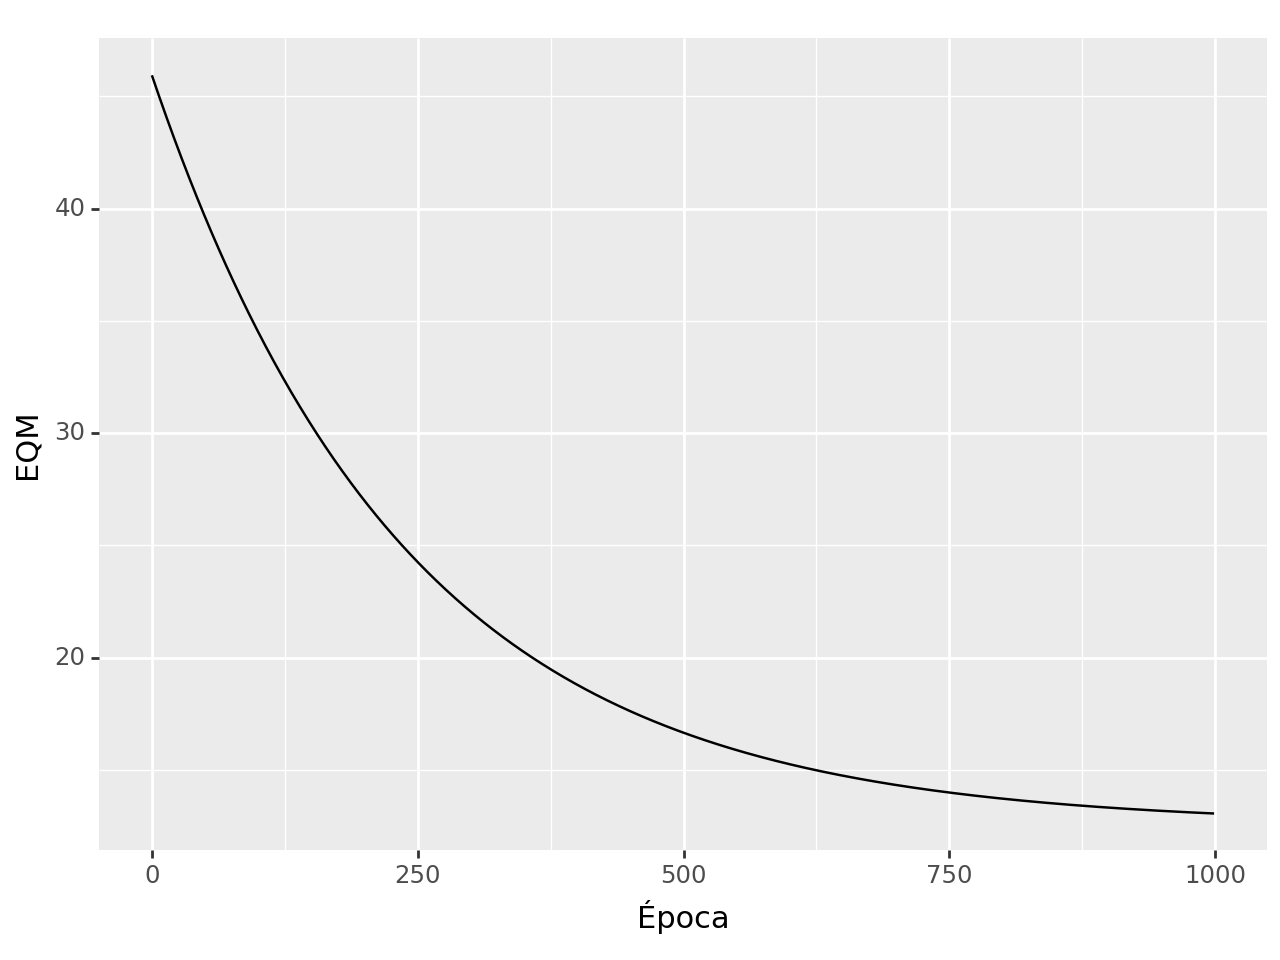

<Figure Size: (640 x 480)>

In [24]:
(ggplot(EQM_df, aes(EQM_df.index, EQM_df[0]))
    + geom_line()
    + xlab('Época')
    + ylab('EQM')
)